Notes:
- Extend embedding to linear readout

# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

# Generate Training Data

In [58]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Parameter Grids Build and Loaded!
Complete NEU-Structure Building Procedure!!!
Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN (Fully Coupled) Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


When generating data...you may use one of the following options:
- For evaluating non-localy patterns: "nonlocality"
- For evaluating model performance when faced with non-stationary osculatory behaviour: "oscilatory"
- For evaluating jump-type performance when faced with a discontinuity: "jumpdiscontinuity"
- For fun/debugging/sanity checking: "the_nightmare"

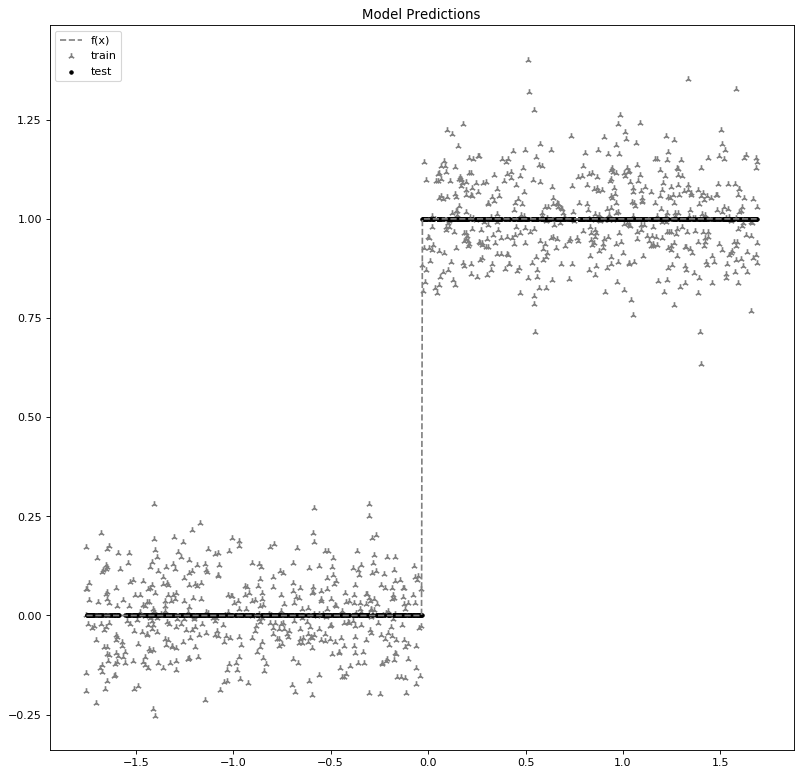

Simulation Confiugration Information:
 
We're plotting the function: jumpdiscontinuity with 0.1 additive noise, a distortion/model uncertainty level of 0.1, and an out-of sample window on either side of the input space of: 0.  We train using 1000 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


In [59]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "jumpdiscontinuity"
# %run Data_Generator.ipynb
exec(open('Data_Generator.py').read())

**TEMP:**

Data Driven Robustness Rule:
Using [this article](https://www.sciencedirect.com/science/article/pii/S0378375815000403) for the variance estimate.  
$$
\hat{\sigma}^2 \triangleq
\frac1{(n-1)}\sum_{1<n\leq N} (y_n - y_{n-1})^2
.
$$

We couple it to the problem via the following
$$
\underset{\underset{0\leq w_n\leq 1}{\sum_{n\leq N} w_n=1}}{\operatorname{argmax}} \sum_{n\leq N} w_n L(f(x_n),\hat{f}(x_n),x_n) - \sigma^2 \sum_{n\leq N} w_n \ln\left(\frac{w_n}{N}\right)
.
$$

In [60]:
# GET STATISTICAL VARIANCE ESTIMATE
var_estimate = np.sum(np.diff(data_y)**2)/(((data_y.shape[0])-1))
var_estimate = np.float(round(var_estimate,3))
factor = 1

robustness_dictionary = {'robustness_parameter': [var_estimate*factor,var_estimate*2*factor,var_estimate*3*factor]}
#==================================================================================#        
### Create NEU parameter disctionary by parameters joining model it is upgrading ###
#==================================================================================#
param_grid_NEU_Nets = {**param_grid_NEU_Nets,
                       **robustness_dictionary}

param_grid_NEU_Feature_Only_Nets = {**param_grid_NEU_Feature_Only_Nets,
                                    **robustness_dictionary}

NEU_Structure_Dictionary = {**NEU_Structure_Dictionary,
                            **robustness_dictionary}

# NEU OLS Keys
param_grid_NEU_Reg_Nets = {**param_grid_NEU_Nets,
                           **robustness_dictionary}

param_grid_NEU_Reg_Nets.pop('height', None)
param_grid_NEU_Reg_Nets.pop('depth', None)
print(" ")

# Benchmark Models

Run univariate regression benchmarks file:

In [4]:
# %run Univariate_Regression_Benchmark_Models.ipynb
exec(open('Univariate_Regression_Benchmark_Models.py').read())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    1.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.8s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   32.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   32.5s finished


Epoch 1/200
125/125 [==============================] - 0s 761us/step - loss: 0.5594 - mse: 0.5275 - mae: 0.5594 - mape: 152.2578
Epoch 2/200
125/125 [==============================] - 0s 728us/step - loss: 0.5532 - mse: 0.5125 - mae: 0.5532 - mape: 199.3081
Epoch 3/200
125/125 [==============================] - 0s 701us/step - loss: 0.5470 - mse: 0.4966 - mae: 0.5470 - mape: 270.7852
Epoch 4/200
125/125 [==============================] - 0s 739us/step - loss: 0.5393 - mse: 0.4785 - mae: 0.5393 - mape: 320.6895
Epoch 5/200
125/125 [==============================] - 0s 820us/step - loss: 0.5282 - mse: 0.4530 - mae: 0.5282 - mape: 384.0927
Epoch 6/200
125/125 [==============================] - 0s 758us/step - loss: 0.5130 - mse: 0.4205 - mae: 0.5130 - mape: 431.9407
Epoch 7/200
125/125 [==============================] - 0s 713us/step - loss: 0.4921 - mse: 0.3791 - mae: 0.4921 - mape: 506.6818
Epoch 8/200
125/125 [==============================] - 0s 724us/step - loss: 0.4648 - mse: 0.3313

Epoch 64/200
125/125 [==============================] - 0s 758us/step - loss: 0.2238 - mse: 0.0758 - mae: 0.2238 - mape: 956.6550
Epoch 65/200
125/125 [==============================] - 0s 699us/step - loss: 0.2238 - mse: 0.0760 - mae: 0.2238 - mape: 949.5526
Epoch 66/200
125/125 [==============================] - 0s 743us/step - loss: 0.2237 - mse: 0.0757 - mae: 0.2237 - mape: 965.1753
Epoch 67/200
125/125 [==============================] - 0s 713us/step - loss: 0.2237 - mse: 0.0758 - mae: 0.2237 - mape: 958.1260
Epoch 68/200
125/125 [==============================] - 0s 866us/step - loss: 0.2236 - mse: 0.0757 - mae: 0.2236 - mape: 944.4188
Epoch 69/200
125/125 [==============================] - 0s 698us/step - loss: 0.2237 - mse: 0.0757 - mae: 0.2237 - mape: 951.3432
Epoch 70/200
125/125 [==============================] - 0s 728us/step - loss: 0.2236 - mse: 0.0758 - mae: 0.2236 - mape: 947.1901
Epoch 71/200
125/125 [==============================] - 0s 706us/step - loss: 0.2235 - mse

125/125 [==============================] - 0s 717us/step - loss: 0.2198 - mse: 0.0740 - mae: 0.2198 - mape: 878.3819
Epoch 127/200
125/125 [==============================] - 0s 719us/step - loss: 0.2197 - mse: 0.0738 - mae: 0.2197 - mape: 885.3540
Epoch 128/200
125/125 [==============================] - 0s 677us/step - loss: 0.2196 - mse: 0.0739 - mae: 0.2196 - mape: 872.6638
Epoch 129/200
125/125 [==============================] - 0s 873us/step - loss: 0.2194 - mse: 0.0737 - mae: 0.2194 - mape: 878.0882
Epoch 130/200
125/125 [==============================] - 0s 883us/step - loss: 0.2194 - mse: 0.0738 - mae: 0.2194 - mape: 871.2066
Epoch 131/200
125/125 [==============================] - 0s 711us/step - loss: 0.2193 - mse: 0.0736 - mae: 0.2193 - mape: 879.9496
Epoch 132/200
125/125 [==============================] - 0s 686us/step - loss: 0.2191 - mse: 0.0737 - mae: 0.2191 - mape: 871.6220
Epoch 133/200
125/125 [==============================] - 0s 726us/step - loss: 0.2190 - mse: 0.07

125/125 [==============================] - 0s 728us/step - loss: 0.1971 - mse: 0.0640 - mae: 0.1971 - mape: 617.7766
Epoch 189/200
125/125 [==============================] - 0s 710us/step - loss: 0.1963 - mse: 0.0635 - mae: 0.1963 - mape: 609.4945
Epoch 190/200
125/125 [==============================] - 0s 717us/step - loss: 0.1954 - mse: 0.0630 - mae: 0.1954 - mape: 602.5384
Epoch 191/200
125/125 [==============================] - 0s 698us/step - loss: 0.1945 - mse: 0.0628 - mae: 0.1945 - mape: 593.1215
Epoch 192/200
125/125 [==============================] - 0s 967us/step - loss: 0.1936 - mse: 0.0623 - mae: 0.1936 - mape: 585.8014
Epoch 193/200
125/125 [==============================] - 0s 796us/step - loss: 0.1927 - mse: 0.0619 - mae: 0.1927 - mape: 580.8212
Epoch 194/200
125/125 [==============================] - 0s 709us/step - loss: 0.1918 - mse: 0.0615 - mae: 0.1918 - mape: 568.6074
Epoch 195/200
125/125 [==============================] - 0s 701us/step - loss: 0.1909 - mse: 0.06

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [61]:
tf.random.set_seed(2020)

start = time.time()
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,data_x.reshape(-1,D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,data_x_test.reshape(-1,D)],axis=1)


# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   46.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   46.8s finished


Epoch 1/200
125/125 [==============================] - 1s 5ms/step - loss: 0.6457 - mse: 0.5530 - mae: 0.5699 - mape: 114.3378
Epoch 2/200
125/125 [==============================] - 0s 4ms/step - loss: 0.6411 - mse: 0.5479 - mae: 0.5674 - mape: 120.6419
Epoch 3/200
125/125 [==============================] - 0s 4ms/step - loss: 0.6367 - mse: 0.5428 - mae: 0.5649 - mape: 125.2418
Epoch 4/200
125/125 [==============================] - 0s 4ms/step - loss: 0.6321 - mse: 0.5377 - mae: 0.5625 - mape: 133.7401
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 0.6275 - mse: 0.5326 - mae: 0.5600 - mape: 141.2987
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 0.6231 - mse: 0.5276 - mae: 0.5576 - mape: 148.7686
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 0.6188 - mse: 0.5226 - mae: 0.5552 - mape: 156.3474
Epoch 8/200
125/125 [==============================] - 0s 2ms/step - loss: 0.6147 - mse: 0.5175 - mae: 0.5527 -

125/125 [==============================] - 0s 2ms/step - loss: 0.3612 - mse: 0.1751 - mae: 0.3469 - mape: 621.8647
Epoch 66/200
125/125 [==============================] - 0s 2ms/step - loss: 0.3565 - mse: 0.1698 - mae: 0.3424 - mape: 635.0182
Epoch 67/200
125/125 [==============================] - 0s 2ms/step - loss: 0.3516 - mse: 0.1650 - mae: 0.3378 - mape: 647.6705
Epoch 68/200
125/125 [==============================] - 0s 4ms/step - loss: 0.3468 - mse: 0.1600 - mae: 0.3332 - mape: 658.4944
Epoch 69/200
125/125 [==============================] - 0s 3ms/step - loss: 0.3419 - mse: 0.1552 - mae: 0.3285 - mape: 668.8474
Epoch 70/200
125/125 [==============================] - 0s 2ms/step - loss: 0.3370 - mse: 0.1504 - mae: 0.3238 - mape: 679.6275
Epoch 71/200
125/125 [==============================] - 0s 3ms/step - loss: 0.3320 - mse: 0.1458 - mae: 0.3191 - mape: 690.3116
Epoch 72/200
125/125 [==============================] - 0s 2ms/step - loss: 0.3270 - mse: 0.1412 - mae: 0.3144 - mape

125/125 [==============================] - 0s 2ms/step - loss: 0.2261 - mse: 0.0740 - mae: 0.2228 - mape: 981.2168
Epoch 129/200
125/125 [==============================] - 0s 2ms/step - loss: 0.2260 - mse: 0.0740 - mae: 0.2227 - mape: 983.7968
Epoch 130/200
125/125 [==============================] - 0s 2ms/step - loss: 0.2259 - mse: 0.0740 - mae: 0.2227 - mape: 983.1271
Epoch 131/200
125/125 [==============================] - 0s 3ms/step - loss: 0.2258 - mse: 0.0740 - mae: 0.2227 - mape: 983.4504
Epoch 132/200
125/125 [==============================] - 0s 3ms/step - loss: 0.2257 - mse: 0.0739 - mae: 0.2226 - mape: 986.5889
Epoch 133/200
125/125 [==============================] - 0s 3ms/step - loss: 0.2257 - mse: 0.0739 - mae: 0.2227 - mape: 988.3705
Epoch 134/200
125/125 [==============================] - 0s 2ms/step - loss: 0.2255 - mse: 0.0739 - mae: 0.2226 - mape: 986.7649
Epoch 135/200
125/125 [==============================] - 0s 2ms/step - loss: 0.2255 - mse: 0.0739 - mae: 0.2226

125/125 [==============================] - 0s 3ms/step - loss: 0.2240 - mse: 0.0739 - mae: 0.2224 - mape: 1013.7039
Epoch 192/200
125/125 [==============================] - 0s 3ms/step - loss: 0.2240 - mse: 0.0739 - mae: 0.2224 - mape: 1015.7970
Epoch 193/200
125/125 [==============================] - 0s 3ms/step - loss: 0.2240 - mse: 0.0739 - mae: 0.2224 - mape: 1016.6550
Epoch 194/200
125/125 [==============================] - 0s 3ms/step - loss: 0.2240 - mse: 0.0739 - mae: 0.2224 - mape: 1015.0860
Epoch 195/200
125/125 [==============================] - 0s 2ms/step - loss: 0.2240 - mse: 0.0739 - mae: 0.2223 - mape: 1016.0042
Epoch 196/200
125/125 [==============================] - 0s 2ms/step - loss: 0.2239 - mse: 0.0739 - mae: 0.2223 - mape: 1018.1664
Epoch 197/200
125/125 [==============================] - 0s 3ms/step - loss: 0.2240 - mse: 0.0739 - mae: 0.2224 - mape: 1015.5318
Epoch 198/200
125/125 [==============================] - 0s 4ms/step - loss: 0.2239 - mse: 0.0739 - mae:

---
# Linear Model(s)
---

### NEU-Linear *(decoupled implementation)*

In [62]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
#====================================#
# Ordinary Linear Regression Version #
#====================================#
NEU_lin_reg = LinearRegression()
NEU_lin_reg.fit(data_x_featured_train,data_y)
NEU_OLS_train = NEU_lin_reg.predict(data_x_featured_test)
NEU_OLS_test = NEU_lin_reg.predict(data_x_featured_train)

#=====================#
# Elastic Net Version #
#=====================#
# Block warnings that spam when performing coordinate descent (by default) in 1-d.
import warnings
warnings.filterwarnings("ignore")
# Initialize Elastic Net Regularization Model
if trial_run == True: # Fast version for trial
    NEU_lin_reg = ElasticNetCV(cv=5, 
                               random_state=0, 
                               alphas = np.linspace(0,(10**2),5),
                               l1_ratio = np.linspace(0,1,5))
else: #Slow Version for real-deal
    NEU_lin_reg = ElasticNetCV(cv=5, 
                               random_state=0, 
                               alphas = np.linspace(0,(10**2),(10**2)),
                               l1_ratio=np.linspace(0,1,(10**2)))
# Fit Elastic Net Model
NEU_lin_reg.fit(data_x_featured_train,data_y)

ElasticNetCV(alphas=array([  0.,  25.,  50.,  75., 100.]), copy_X=True, cv=5,
             eps=0.001, fit_intercept=True,
             l1_ratio=array([0.  , 0.25, 0.5 , 0.75, 1.  ]), max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
             verbose=0)

In [63]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)

NEU_OLS_y_hat_train_FC = NEU_OLS_train
NEU_OLS_y_hat_test_FC = NEU_OLS_test

end = time.time()

#### Visualization of Feature Space


Embedding Dimension: 20


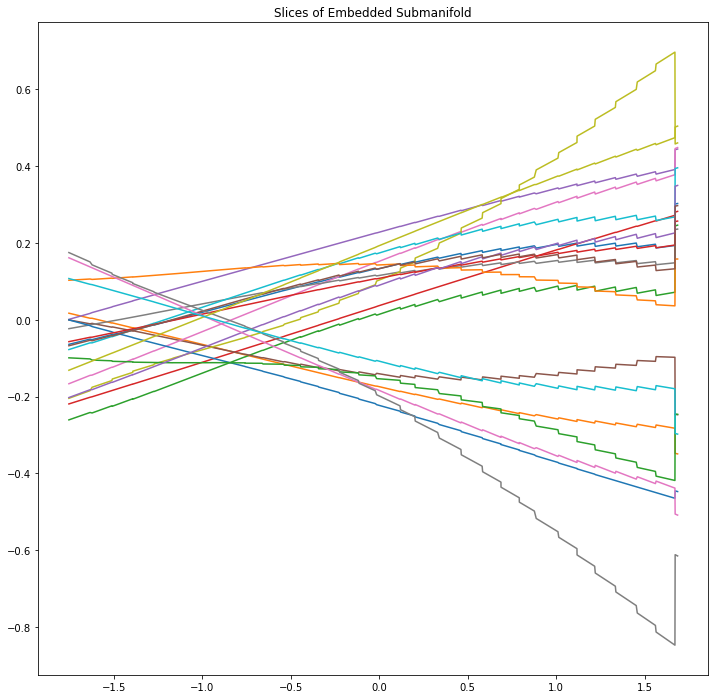

In [64]:
print()
Embedding = pd.DataFrame(data_x_featured_test,index=data_x_test.reshape(-1,), columns=range(0,data_x_featured_test.shape[1]))
# Format Plot #
#-------------#
fig = Embedding.plot(figsize=(12, 12))
fig.get_legend().remove()
plt.title("Slices of Embedded Submanifold")
print("Embedding Dimension: "+str(data_x_featured_test.shape[1]))

# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Sliced_Manifold_Embedding_with_N_Dimensions_'+str(data_x_featured_test.shape[1])+'.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

#### Visual Comaprison between the OLS and the NEU-OLS models:

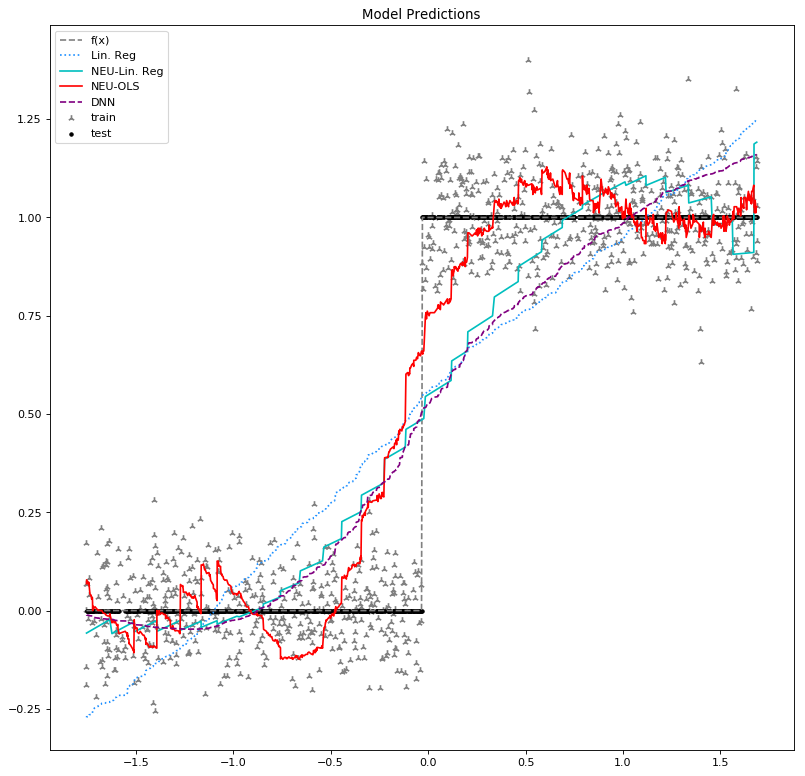

In [65]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')

# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU-Lin. Reg')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test_FC, color = 'red',label='NEU-OLS')
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'purple',linestyle="--",  label='DNN')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

#### Error Distribution NEU-OLS

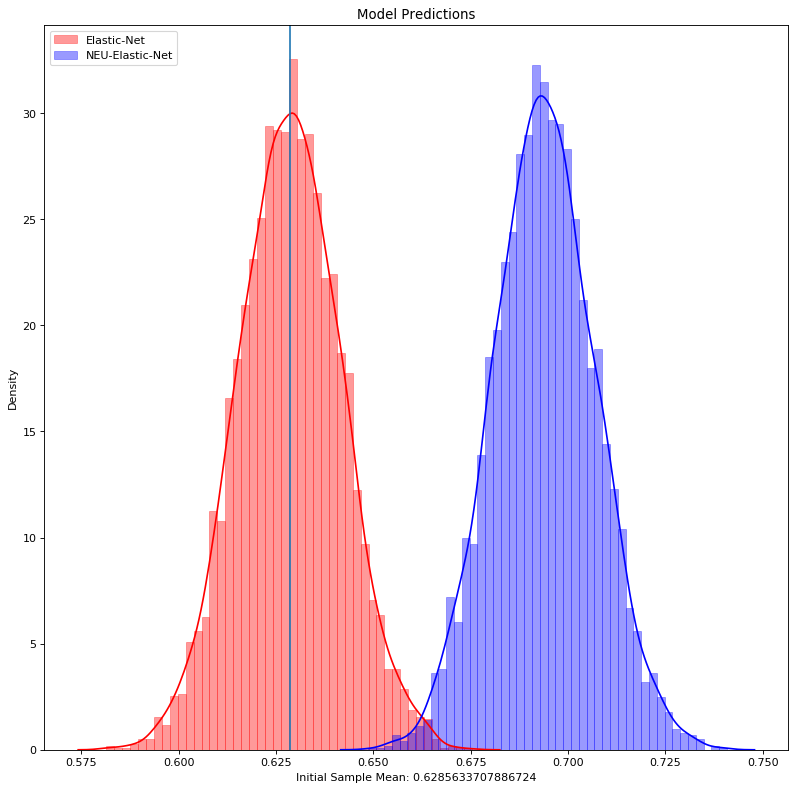

In [66]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test_FC,"Elastic-Net")

#### Error Distribution NEU-ENET

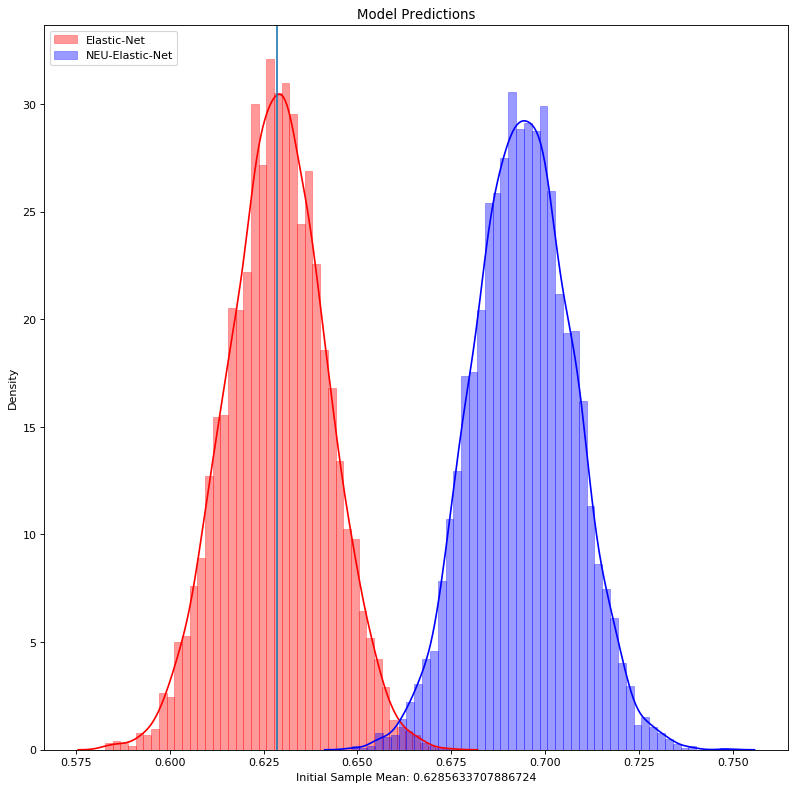

In [67]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test_FC,"Elastic-Net")

#### Comparison between Elastic-Net and NEU-ENET

In [70]:
#-----------------#
# Linear Model(s) #
#-----------------#
# Elastic-Net Performance
print("Elastic-Net Performance:")
print(reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test))


# ffNN
print("Benchmark: DNN (ffNN)")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-Elastic Net Performance
print("NEU-ENET Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Fully Coupled
print("Benchmark: NEU-OLS Coupled")
print(reporter(NEU_OLS_y_hat_train_FC,NEU_OLS_y_hat_test_FC,data_y,data_y_test))

Elastic-Net Performance:
               Train       Test
Er. 95L    -0.015056  -0.021996
Er. Mean    0.001629  -0.007323
Er. 95U     0.018333   0.007651
MAE         0.227006   0.201002
MSE         0.075053   0.057614
MAPE      112.446406  62.778933
Benchmark: DNN (ffNN)
               Train       Test
Er. 95L     0.007626  -0.008423
Er. Mean    0.022161   0.003501
Er. 95U     0.036883   0.015560
MAE         0.183669   0.139256
MSE         0.056958   0.036840
MAPE      448.449337  61.638665
NEU-ENET Performance:
                 Train       Test
Er. 95L  -1.322630e-02  -0.023187
Er. Mean  3.645697e-08  -0.011678
Er. 95U   1.326390e-02  -0.000139
MAE       1.611140e-01   0.129571
MSE       4.574005e-02   0.034755
MAPE      1.532179e+02  59.653264
Benchmark: NEU-OLS Coupled
               Train      Test
Er. 95L     0.008340 -0.041096
Er. Mean    0.019163 -0.031159
Er. 95U     0.030032 -0.021751
MAE         0.130608  0.096924
MSE         0.031866  0.025366
MAPE      150.175563       NaN


In [71]:
print("Time to Trian NEU-OLS: "+str(end - start))

Time to Trian NEU-OLS: 113.1867938041687


---
# Non-Linear Models
---

### NEU-Kernel Ridge Regression *(decoupled implementation)*

In [13]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_KReg_y_hat_train_pre,NEU_KReg_y_hat_test_pre, NEU_KReg_model = get_Kernel_Ridge_Regressor(data_x_in = data_x_featured_train,
                                                                                       data_x_test_in = data_x_featured_test,
                                                                                       data_y_in = data_y)


NEU_KReg_y_hat_train = NEU_KReg_y_hat_train_pre
NEU_KReg_y_hat_test = NEU_KReg_y_hat_test_pre

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0768s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s finished


#### Visual Comaprison between the Kernel Ridge Regression and the NEU-Kernel Ridge Regression models:

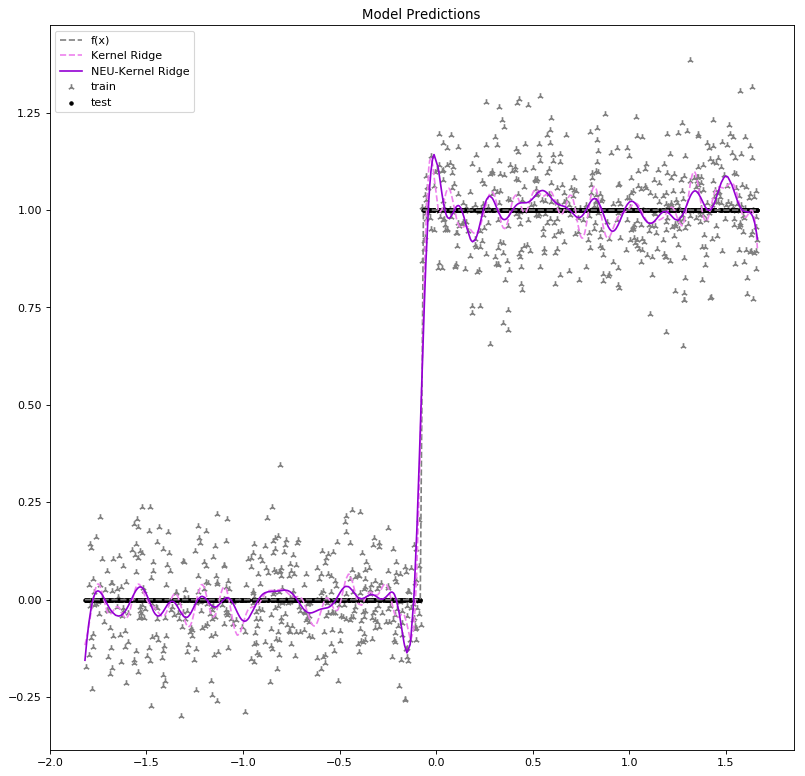

In [14]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Kernel_Ridge.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

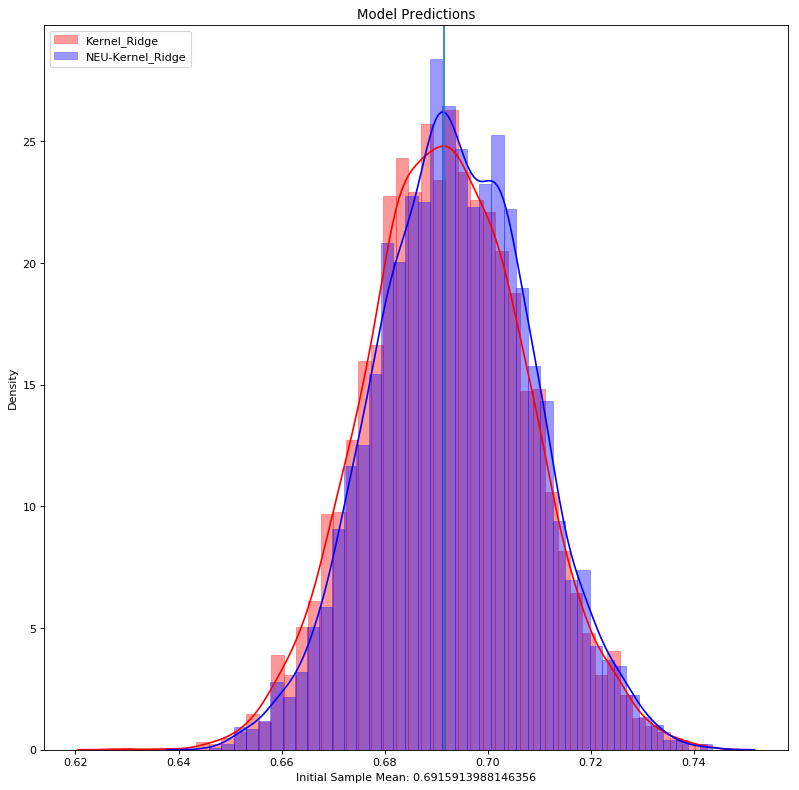

In [15]:
get_Error_distribution_plots(data_y_test,f_hat_kernel_ridge_test,NEU_KReg_y_hat_test,"Kernel_Ridge")

#### Numerical Comparison between the Kernel Ridge regressor and NEU-Kernel Ridge regressor models:

In [16]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
               Train       Test
Er. 95L    -0.006670  -0.000567
Er. Mean    0.000009   0.002372
Er. 95U     0.006547   0.005186
MAE         0.083432   0.034178
MSE         0.011425   0.002243
MAPE      325.791246  50.166000
NEU-Kernel Ridge-Performance:
               Train       Test
Er. 95L    -0.007023  -0.002284
Er. Mean    0.000006   0.000754
Er. 95U     0.006724   0.003589
MAE         0.086764   0.028919
MSE         0.012368   0.002235
MAPE      781.872518  49.882895


## Tree Model(s):
*Naturally, all of these have a decoupled implementation*.

In [87]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_GBRF_y_hat_train_pre,NEU_GBRF_y_hat_test_pre, GBRF_w_NEU_features = get_GBRF(X_train = data_x_featured_train,
                                                                         X_test = data_x_featured_test,
                                                                         y_train = data_y)

NEU_GBRF_y_hat_train = NEU_GBRF_y_hat_train_pre
NEU_GBRF_y_hat_test = NEU_GBRF_y_hat_test_pre

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    2.0s finished


#### Visual Comaprison between the GBRF and the NEU-GBRF models:

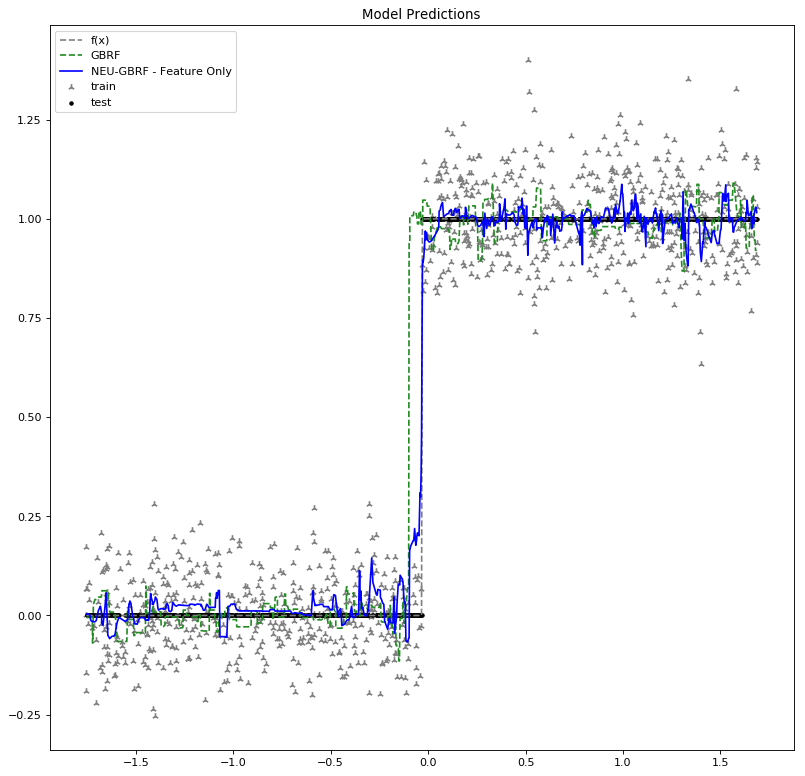

In [88]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, linestyle="--", color = 'forestgreen', label='GBRF')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'blue',label='NEU-GBRF - Feature Only')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/GBRF.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

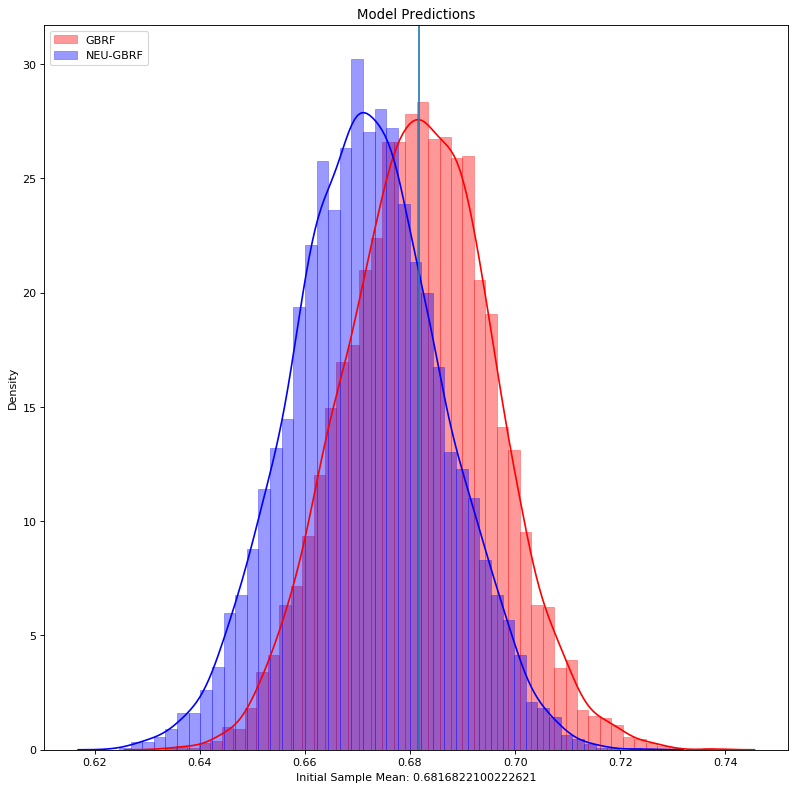

In [89]:
get_Error_distribution_plots(data_y_test,GBRF_y_hat_test,NEU_GBRF_y_hat_test,"GBRF")

#### Numerical Comparison between the GBRF and NEU-GBRF models:

In [90]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
               Train       Test
Er. 95L    -0.005656  -0.030244
Er. Mean    0.001629  -0.020044
Er. 95U     0.008956  -0.010910
MAE         0.089212   0.048047
MSE         0.013455   0.024063
MAPE      583.878074  52.158110
NEU-GBRF-Performance:
                 Train       Test
Er. 95L  -5.042370e-03  -0.012358
Er. Mean -2.131628e-17  -0.009495
Er. 95U   5.276852e-03  -0.006706
MAE       6.689664e-02   0.027509
MSE       7.031255e-03   0.002124
MAPE      3.849545e+02  51.816731


---
## Neural Networks: 
---
### NEU-ffNN

#### A) Fully-Coupled Implementation
- Train feature-map + ffNN ($\hat{f}\circ \phi$) in one go.

In [72]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN_w_feature_only(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Training NEU-ffNN (Fully Coupled)
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   34.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   34.7s finished


Epoch 1/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5615 - mse: 0.5197 - mae: 0.5533 - mape: 137.0747
Epoch 2/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5432 - mse: 0.4857 - mae: 0.5356 - mape: 147.2966
Epoch 3/200
125/125 [==============================] - 0s 1ms/step - loss: 0.4982 - mse: 0.4066 - mae: 0.4917 - mape: 139.3590
Epoch 4/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3907 - mse: 0.2588 - mae: 0.3865 - mape: 187.1145
Epoch 5/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2687 - mse: 0.1423 - mae: 0.2659 - mape: 191.8047
Epoch 6/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2525 - mse: 0.1256 - mae: 0.2501 - mape: 164.5682
Epoch 7/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2468 - mse: 0.1184 - mae: 0.2445 - mape: 177.0531
Epoch 8/200
125/125 [==============================] - 0s 1ms/step - loss: 0.2411 - mse: 0.1121 - mae: 0.2390 -

125/125 [==============================] - 0s 1ms/step - loss: 0.1115 - mse: 0.0226 - mae: 0.1111 - mape: 172.0795
Epoch 66/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.0224 - mae: 0.1107 - mape: 193.7955
Epoch 67/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1110 - mse: 0.0224 - mae: 0.1106 - mape: 174.0871
Epoch 68/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1110 - mse: 0.0224 - mae: 0.1106 - mape: 173.4634
Epoch 69/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.0222 - mae: 0.1104 - mape: 170.8297
Epoch 70/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.0222 - mae: 0.1104 - mape: 177.4083
Epoch 71/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1106 - mse: 0.0222 - mae: 0.1102 - mape: 173.5333
Epoch 72/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1104 - mse: 0.0220 - mae: 0.1100 - mape

125/125 [==============================] - 0s 1ms/step - loss: 0.1003 - mse: 0.0179 - mae: 0.1000 - mape: 119.7370
Epoch 129/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1000 - mse: 0.0178 - mae: 0.0997 - mape: 122.5341
Epoch 130/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0997 - mse: 0.0177 - mae: 0.0994 - mape: 115.9860
Epoch 131/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0995 - mse: 0.0176 - mae: 0.0992 - mape: 111.1823
Epoch 132/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0993 - mse: 0.0175 - mae: 0.0990 - mape: 116.4838
Epoch 133/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0991 - mse: 0.0174 - mae: 0.0988 - mape: 119.1988
Epoch 134/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0173 - mae: 0.0985 - mape: 121.3962
Epoch 135/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0173 - mae: 0.0985

125/125 [==============================] - 0s 2ms/step - loss: 0.0896 - mse: 0.0136 - mae: 0.0894 - mape: 78.6359
Epoch 192/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0899 - mse: 0.0137 - mae: 0.0897 - mape: 70.8839
Epoch 193/200
125/125 [==============================] - 0s 2ms/step - loss: 0.0896 - mse: 0.0136 - mae: 0.0894 - mape: 84.3583
Epoch 194/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0893 - mse: 0.0135 - mae: 0.0891 - mape: 76.1710
Epoch 195/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0892 - mse: 0.0135 - mae: 0.0890 - mape: 76.6615
Epoch 196/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0895 - mse: 0.0136 - mae: 0.0893 - mape: 75.0974
Epoch 197/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0894 - mse: 0.0135 - mae: 0.0892 - mape: 79.4574
Epoch 198/200
125/125 [==============================] - 0s 1ms/step - loss: 0.0890 - mse: 0.0135 - mae: 0.0888 - mape

---

**Note:** The following two models are purely out of personal curiosity and are not included in the paper.  Feel free to use them, they perform well. 

---

#### B) Decoupled Implementation:
- Get Trained Feature map from NEU-OLS $\phi$,
- Train network using feature map $\hat{f}$.

In [73]:
# tf.random.set_seed(2020)
# # 1+2) Learn Linearizing Feature Map #
# #====================================#
# # Completed Above
# print("Phase 1 Complete: Feature Map Trained/Loaded")

# # 2) Train ffNN #
# #===============#
# NEU_ffNN_y_hat_train_dcpld_pre, NEU_ffNN_y_hat_test_dcpld_pre = build_ffNN(n_folds = CV_folds, 
#                                                                    n_jobs = n_jobs, 
#                                                                    n_iter = n_iter, 
#                                                                    param_grid_in = param_grid_Vanilla_Nets,  
#                                                                    X_train = data_x_NEU_train_feature_only, 
#                                                                    y_train = data_y,
#                                                                    X_test = data_x_NEU_test_feature_only)

# NEU_ffNN_y_hat_train_Dcpld = NEU_ffNN_y_hat_train_dcpld_pre
# NEU_ffNN_y_hat_test_Dcpld = NEU_ffNN_y_hat_test_dcpld_pre
    
# # Update User #
# #-------------#
# print("Phase 3 Complete: Trained NEU-Structure Map")
# print("NEU Statue: Trained")

## Visualization

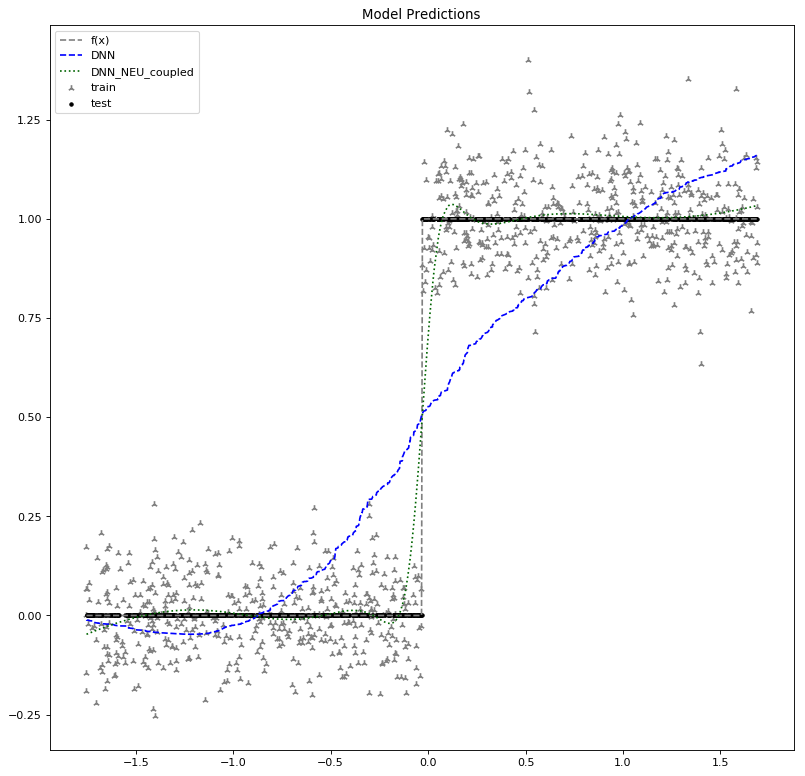

In [96]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'blue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'darkgreen',label='DNN_NEU_coupled')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Neural_Network_Models.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

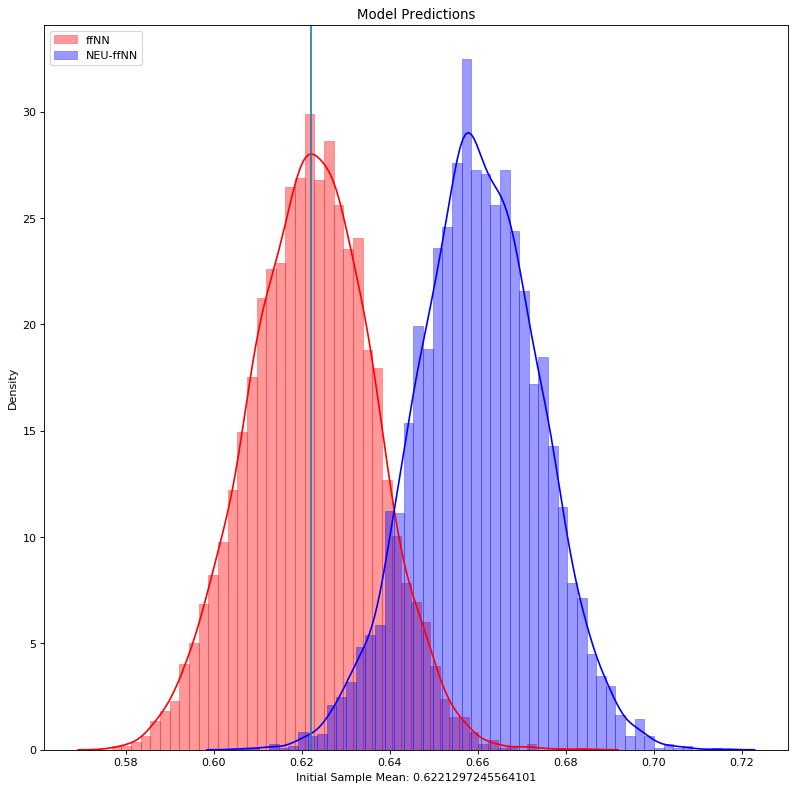

In [75]:
get_Error_distribution_plots(data_y_test,ffNN_y_hat_test,NEU_ffNN_y_hat_test,"ffNN")

---
---
---

---
# Result(s)
---

## Generate Results Table(s):

In [91]:
#==========#
# Training #
#==========#
train_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train_FC,NEU_OLS_y_hat_test_FC,data_y,data_y_test).iloc[:,0],
                                   "NEU-ENET": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,0]}).transpose()


train_performance.to_latex("./outputs/tables/Train_performance.tex")

#=========#
# Testing #
#=========#
test__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train_FC,NEU_OLS_y_hat_test_FC,data_y,data_y_test).iloc[:,1],
                                   "NEU-ENET": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
#                                    "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,1]}).transpose()

test__performance.to_latex("./outputs/tables/Test_performance.tex")

# Visualize Predictions

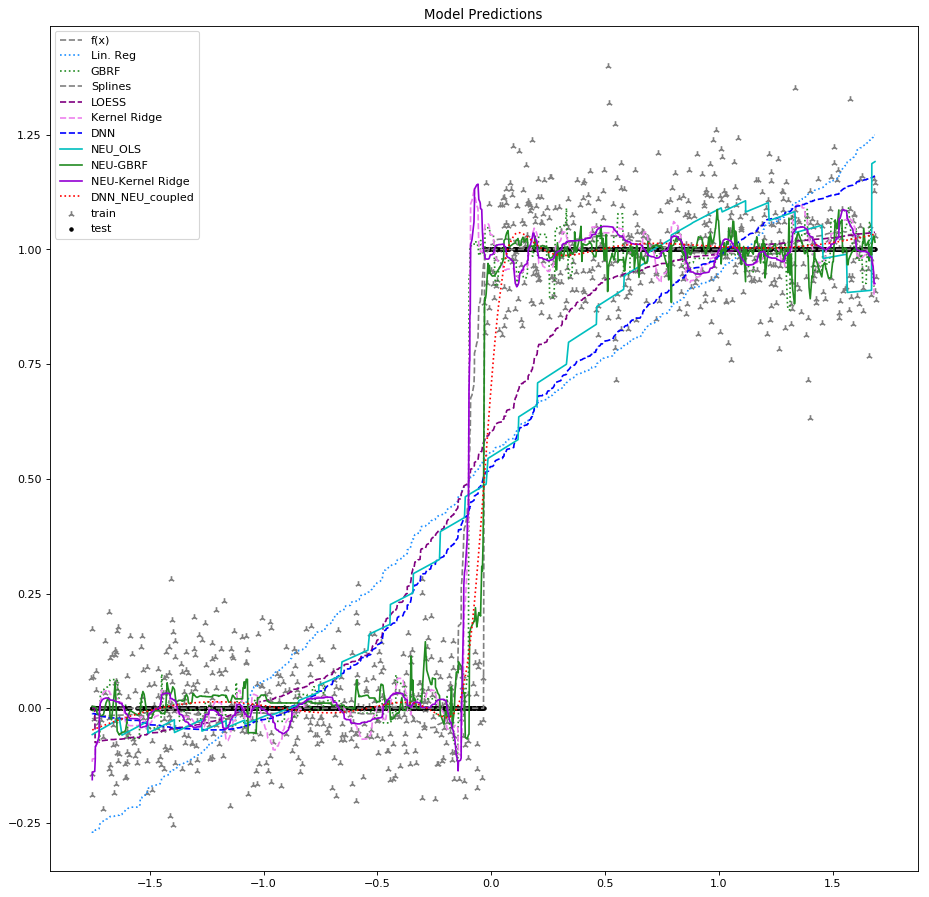

In [98]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='OLS')
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, color = 'forestgreen',linestyle=":", label='GBRF')
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test,color='grey',linestyle="--",label='Splines')
plt.plot(np.array(data_x_test_raw).reshape(-1,),LOESS_prediction_test,color='purple',linestyle="--",label='LOESS')
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'blue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'red',label='DNN_NEU_coupled')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Full_Picture.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

 ---

## Performance Report
- First, we print the comparison tables (so it can be viewed from the command-line if it is being run live on a grid/cluster/remotely).
- Second, we display the training and testing performances in clean dataframes.

In [78]:
#--------------------#
# Classical Model(s) #
#--------------------#
# OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

OLS-Performance:
NEU-OLS-Performance:
                 Train       Test
Er. 95L  -1.324974e-02  -0.023259
Er. Mean  3.645697e-08  -0.011678
Er. 95U   1.351549e-02  -0.000060
MAE       1.611140e-01   0.129571
MSE       4.574005e-02   0.034755
MAPE      1.532179e+02  59.653264


In [79]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
               Train       Test
Er. 95L    -0.005503  -0.030990
Er. Mean    0.001638  -0.020628
Er. 95U     0.008894  -0.011081
MAE         0.090151   0.055774
MSE         0.013191   0.026141
MAPE      348.406941  52.275587
NEU-Kernel Ridge-Performance:
                Train       Test
Er. 95L     -0.005576  -0.032562
Er. Mean     0.001635  -0.022246
Er. 95U      0.008756  -0.012747
MAE          0.089352   0.049757
MSE          0.013373   0.026035
MAPE      1036.018448  51.907273


In [80]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
               Train       Test
Er. 95L    -0.005420  -0.029999
Er. Mean    0.001629  -0.020044
Er. 95U     0.008726  -0.010954
MAE         0.089212   0.048047
MSE         0.013455   0.024063
MAPE      583.878074  52.158110
NEU-GBRF-Performance:
               Train       Test
Er. 95L    -0.005666  -0.029987
Er. Mean    0.001629  -0.020044
Er. 95U     0.008876  -0.010871
MAE         0.089212   0.048047
MSE         0.013455   0.024063
MAPE      583.878074  52.158110


In [81]:
#-----------------------------------------------------#
# Classical Non-Linear Univariate Regression Model(s) #
#-----------------------------------------------------#
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
               Train       Test
Er. 95L    -0.006172  -0.030278
Er. Mean    0.001629  -0.022338
Er. 95U     0.009199  -0.015039
MAE         0.094175   0.035540
MSE         0.015688   0.015770
MAPE      816.732828  51.403472
LOESS Performance:
               Train      Test
Er. 95L    -0.013109 -0.029721
Er. Mean    0.000541 -0.018749
Er. 95U     0.014223 -0.008322
MAE         0.161665  0.109908
MSE         0.047147  0.030727
MAPE      757.859449       NaN


In [82]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:") #Readout Form!
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))

# print("NEU-ffNN (Decoupled) Performance:")
# print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

ffNN-Performance:
               Train       Test
Er. 95L     0.007724  -0.008687
Er. Mean    0.022161   0.003501
Er. 95U     0.037061   0.015342
MAE         0.183669   0.139256
MSE         0.056958   0.036840
MAPE      448.449337  61.638665
NEU-ffNN (Coupled) Performance:
               Train       Test
Er. 95L    -0.006532  -0.008943
Er. Mean    0.000554  -0.004832
Er. 95U     0.007753  -0.000828
MAE         0.088508   0.023478
MSE         0.013278   0.004368
MAPE      824.237921  52.173341


# Report

## Re-Summarize Learning Problem for easy recap :)

In [83]:
print("Simulation Confiugration Information:")
print(" ")
print("=========================================================================================================================================================")
print(the_facts)
print("=========================================================================================================================================================")
print(" ")

Simulation Confiugration Information:
 
We're plotting the function: jumpdiscontinuity with 0.1 additive noise, a distortion/model uncertainty level of 0.1, and an out-of sample window on either side of the input space of: 0.  We train using 1000 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


## Train-Set Performance

In [93]:
train_performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.006049,1.628771e-03,0.009453,0.094175,0.015688,816.732828
LOESS,-0.012729,5.413840e-04,0.014142,0.161665,0.047147,757.859449
Elastic Net,-0.015224,1.628771e-03,0.018943,0.227006,0.075053,112.446406
NEU-OLS,0.008248,1.916345e-02,0.030242,0.130608,0.031866,150.175563
NEU-ENET,-0.013139,3.645697e-08,0.013331,0.161114,0.045740,153.217855
Kernel,-0.005471,1.638200e-03,0.008670,0.090151,0.013191,348.406941
NEU-KerRidge,-0.005727,1.634902e-03,0.008890,0.089352,0.013373,1036.018448
GBRF,-0.005693,1.628771e-03,0.008737,0.089212,0.013455,583.878074
NEU-GBRF,-0.005162,-2.131628e-17,0.005270,0.066897,0.007031,384.954480
ffNN,0.007409,2.216112e-02,0.037038,0.183669,0.056958,448.449337


## Test-Set Performance

In [92]:
test__performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.030298,-0.022338,-0.015049,0.035540,0.015770,51.403472
LOESS,-0.029740,-0.018749,-0.008134,0.109908,0.030727,NaN
Elastic Net,-0.022310,-0.007323,0.007463,0.201002,0.057614,62.778933
NEU-OLS,-0.041110,-0.031159,-0.021596,0.096924,0.025366,NaN
NEU-ENET,-0.023443,-0.011678,-0.000021,0.129571,0.034755,59.653264
Kernel,-0.030871,-0.020628,-0.011118,0.055774,0.026141,52.275587
NEU-KerRidge,-0.032508,-0.022246,-0.012849,0.049757,0.026035,51.907273
GBRF,-0.029924,-0.020044,-0.011149,0.048047,0.024063,52.158110
NEU-GBRF,-0.012332,-0.009495,-0.006784,0.027509,0.002124,51.816731
ffNN,-0.008740,0.003501,0.015629,0.139256,0.036840,61.638665


#### The END

---